In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  
import pandas as pd
import math

Generate Synthetic Data 

In [12]:
# Let's create our own dataset

# generate the input using uniform distribution over [0, 1)
num_points= 100 
x1 = 2* np.random.rand(num_points, 1) 
gaussian_noise= np.random.randn(num_points, 1)
theta0= 5
theta1= 1
t = theta0 + theta1 * x1 + gaussian_noise

# generate the output using the parameter you choose

In [13]:
x0= np.ones((num_points, 1))
X = np.c_[x0, x1] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)
theta_best

array([[4.82584803],
       [1.10930901]])

In [ ]:
#Use the close form formula
# You need to add 1 to x1 to create a matrix that include x1 and x0(intercept )

array([[3.89766411],
       [9.99419553]])

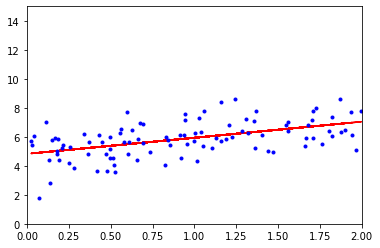

In [16]:
#Let's plot the data
X_new = np.c_[np.ones((num_points, 1)), x1] # add x0 = 1 to each instance
y_predict = X_new.dot(theta_best)
plt.plot(x1, y_predict, "r-")
plt.plot(x1, t, "b.")
plt.axis([0, 2, 0, 15]) #x axis range 0 to 2 and y axis range 0 to 15
plt.show()


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(x1, t)
lin_reg.intercept_, lin_reg.coef_

(array([4.82584803]), array([[1.10930901]]))

Work with Position Salaries Dataset

https://www.kaggle.com/akram24/position-salaries

In [18]:
dataset=pd.read_csv('/content/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
# fit a model 
# separate input and output
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2].values
#fit a regression model
lin_reg= LinearRegression()  
lin_reg.fit(x,y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

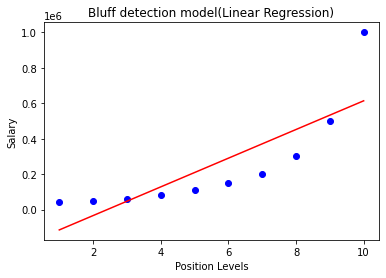

In [20]:
# plot the data
plt.scatter(x,y,color="blue")  
plt.plot(x,lin_reg.predict(x), color="red")  
plt.title("Bluff detection model(Linear Regression)")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.show()

In [26]:
#create Degree 3 model
#generate polynomial features
poly_reg_2= PolynomialFeatures(degree= 100)  
x_poly= poly_reg_2.fit_transform(x)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y)  
#fit linear regression model  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

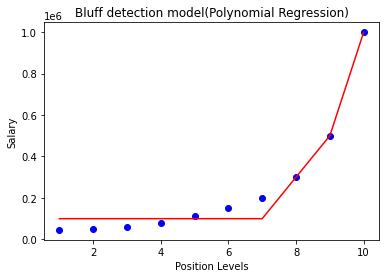

In [27]:
# plot the data
#plot
plt.scatter(x,y,color="blue")  
plt.plot(x, lin_reg_2.predict(poly_reg_2.fit_transform(x)), color="red")  
plt.title("Bluff detection model(Polynomial Regression)")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.show()  

Sin

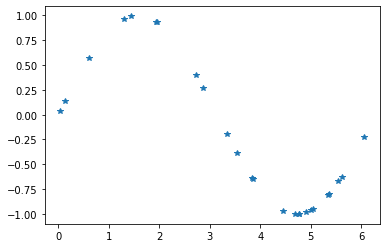

In [50]:
#genarate 50 points of data between 0 and 2*pi
x= 2*math.pi* np.random.rand(25, 1)
# sort the numbers
x= np.sort(x, axis =0)
#Assume a true function y = sin (x) 
# I use ravel() to get a 1-D array otherwise you will have 2-D array 
y=np.sin(x).ravel()
plt.plot(x,y,'*')

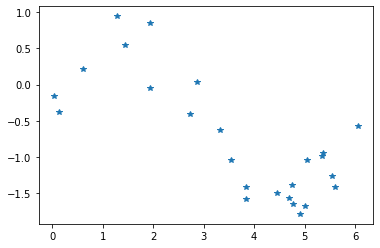

In [51]:
#add noise to a subset of y values
t=y + 0.01-np.random.rand(25)
plt.plot(x,t,'*')

In [45]:
lin_reg= LinearRegression()  
lin_reg.fit(x,t)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# when we draw, I predict using more points for illustration
x_predict=np.linspace(0,2*math.pi,200)

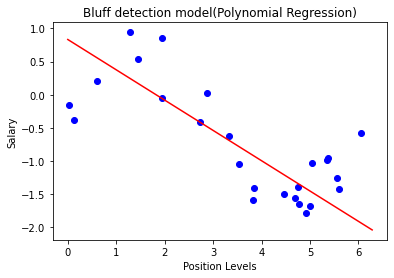

In [69]:
plt.scatter(x,t,color="blue") 
#You should reshape your X to be a 2D array not 1D array. Fitting a model requires requires a 2D array. 
plt.plot(x_predict, lin_reg.predict(x_predict.reshape(-1, 1)), color="red")  
plt.title("Bluff detection model(Polynomial Regression)")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.show()

In [70]:
poly_reg_4= PolynomialFeatures(degree= 4)
# transform  
x_poly= poly_reg_4.fit_transform(x)  
lin_reg_4 =LinearRegression()  
lin_reg_4.fit(x_poly, t)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

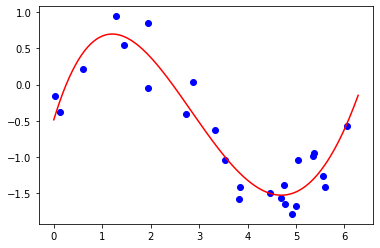

In [71]:
plt.scatter(x,t,color="blue")  
plt.plot(x_predict, lin_reg_4.predict(poly_reg_4.fit_transform(x_predict.reshape(-1, 1))), color="red")  
plt.show()

In [78]:
poly_reg_10= PolynomialFeatures(degree= 10)
# transform  
x_poly= poly_reg_10.fit_transform(x)  
lin_reg_10 =LinearRegression()  
lin_reg_10.fit(x_poly, t)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

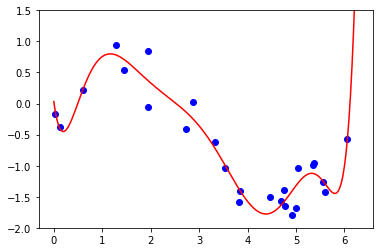

In [81]:
plt.scatter(x,t,color="blue")  
plt.plot(x_predict, lin_reg_10.predict(poly_reg_10.fit_transform(x_predict.reshape(-1, 1))), color="red")  
plt.ylim([-2, 1.5])
plt.show()